# **Confusion Matrix**

Confusion Matrix gerçek veriler ile model oluşturulduktan sonra tahmin edilen değerleri karşılaştırmaya olanak sağlar.

Gerçek verilerle tahmin edilen veriler aynıysa **True**, değilse **False** olarak adlandırılır.

Model oluşturulurken iki ya da daha fazla feature seçilir. Confusion matrix çizdirilirken bu featurelardan hangisi üzerine kurulu bir tahmin yapılıyorsa o tahmin **positive**, diğer tahminler **negative** olur.

Model kedi ve köpek featurelarından oluştuğunda;

Classification yapmak için kediler 1, köpekler 0 olarak adlandırıldığında yapılan prediction kediler üzerine kurulu olur.

Bu durumda;

Gerçek veri ile tahmin edilen veri eşleşmişse (gerçek veri kedi ve tahmin edilen veri kedi) (gerçek veri köpek ve tahmin edilen veri köpek) True olarak adlandırılır.

Yapılan prediction kedi üzerine kurulu olduğundan prediction kedi ve gerçek veri de kedi ise positive'dır.

Gerçek veri kedi ancak prediction ise köpek negative olur.

TP -> gerçek veri kedi, yapılan prediction kedi

FN -> gerçek veri kedi, yapılan prediction köpek

TN -> gerçek veri köpek, yapılan prediction köpek

FP -> gerçek veri köpek, yapılan prediction kedi



**Random Forest Classifier**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
#axis=1 olduğunda sütun drop edilir.
#inplace=True olduğunda yapılan değişiklik dataya kaydedilir.

In [ ]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

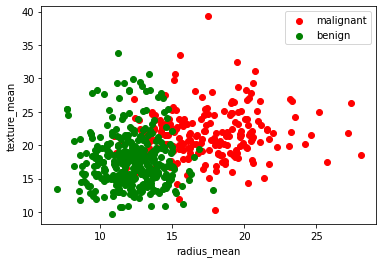

In [ ]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [ ]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunundaki veriler string olduğundan sınıflandırma yapılırken karşılaştırma yapılamaz.
#bu yüzden kötü huylu tümör '1'e , iyi huylu tümör '0'a dönüştürülür.

In [ ]:
y = data.diagnosis.values #pandas series values methodu ile numpy array'e çevrilir.

In [ ]:
x_data= data.iloc[:,1:3].values #radius_mean ve texture_mean feature olarak seçilir.

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,random_state=1)
#random_state parametresiyle data train ve test olarak bölünürken kod her çalıştırıldığında aynı randomlıkta bölünür.
#bu parametre kullanılmazsa data her seferinde farklı yerlerden train ve test olarak ayrılacaktır.

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
#random forest classification model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=30,max_depth=3, random_state=1,criterion="entropy")
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=30,
                       random_state=1)

In [ ]:
#prediction
y_head = rf_classifier.predict(x_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_head)
print("Accuracy of decision tree classification: {}".format(accuracy))

Accuracy of decision tree classification: 0.8771929824561403


Random Forest Classification algoritmasıyla yapılan predictionların %87'si doğrudur.


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

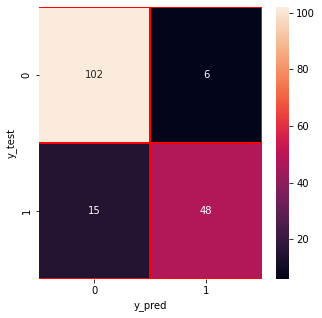

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

0-> iyi huylu tümör

1 -> köyü huylu tümör

Yapılan prediction kötü huylu tümör üzerine kuruludur.

Bu durumda;

**TP** -> gerçek veri kötü huylu tümör, prediction kötü huylu tümör

**FN** -> gerçek veri kötü huylu tümör, prediction iyi huylu tümör

**TN** -> gerçek veri iyi huylu tümör, prediction iyi huylu tümör

**FP** -> gerçek veri iyi huylu tümör, prediction kötü huylu tümör

**Confusion Matrix**

**TN** **FP**

**FN** **TP**

Confusion matrix'e bakarak; iyi huylu tümörde 108 sample'ın 100'ünün doğru tahmin edildiği, 8 sample'ın gerçekte iyi huylu tümör olup kötü huylu tümör olarak yanlış tahmin edildiği,

kötü huylu tümörde 63 sample'ın 50'sinin doğru tahmin edildiği, 13 sample'ın gerçekte kötü huylu tümör olup iyi huylu tümör olarak yanlış tahmin edildiği görülür.